<a href="https://colab.research.google.com/github/AbdullahNasser98/Twitter-Sentiment-Analysis/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullahnasser","key":"cf934485d641c4759dcc24e8c3a3a170"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 102MB/s]


In [ ]:
!ls

kaggle.json  sample_data  twitter-sentiment-analysis-hatred-speech.zip


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('twitter-sentiment-analysis-hatred-speech.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv(r"/content/files/train.csv")
test_data = pd.read_csv(r"/content/files/test.csv")

In [ ]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
print(train_data.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [ ]:
tweets = train_data['tweet'].tolist()
labels = train_data['label'].values

In [ ]:
print(tweets[:10])
#print(labels)

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation', '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ', ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦', "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl", 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ', " @user @user welcome here !  i'm   it's so #gr8 ! "]


In [ ]:
#Check that the data is balanced
print('Positive reviews: {}'.format((train_data['label']==0).sum()))
print('Negative reviews: {}'.format((train_data['label']==1).sum()))

Positive reviews: 29720
Negative reviews: 2242


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer           ###Group similar words together, like rocks and rock
lem = WordNetLemmatizer()

nltk.download("wordnet")                         ###Same as above

nltk.download("stopwords")                       ###Contains unnecessary words like 'is', 'a'

from nltk.corpus import stopwords
nltk.download("words")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
english_words = set(nltk.corpus.words.words())

In [ ]:
from collections import Counter
def preprocess(text):
    ###Remove stop and meaningless words
    text = text.lower()
    new_text = ""
    for word in text.split():
        if word in english_words and word not in stop_words and word.isalpha():
            new_text = new_text + " " + word
    ###Replace punctuation with tokkens
    new_text = new_text.replace('.', ' <PERIOD> ')
    new_text = new_text.replace(',', ' <COMMA> ')
    new_text = new_text.replace('"', ' <QUOTATION_MARK> ')
    new_text = new_text.replace(';', ' <SEMICOLON> ')
    new_text = new_text.replace('!', ' <EXCLAMATION_MARK> ')
    new_text = new_text.replace('?', ' <QUESTION_MARK> ')
    new_text = new_text.replace('(', ' <LEFT_PAREN> ')
    new_text = new_text.replace(')', ' <RIGHT_PAREN> ')
    new_text = new_text.replace('--', ' <HYPHENS> ')
    new_text = new_text.replace('?', ' <QUESTION_MARK> ')
    new_text = new_text.replace('#', ' ')
    
    ###Lematize
    lem_text = ""
    for word in new_text.split():
        lem_text = lem_text + " " + lem.lemmatize(word)
#     ##Remove words that occur less than 5 times
#     words = text.split()
#     words_count = Counter(words)
#     trimmed_words = []
#     for word in words:
#         if words_count[word] > 0:
#             trimmed_words.append(word)

    return lem_text


            
    ###Remove non english and meaningless words
    
    
    #return trimmed_words

In [ ]:
data = []
for sent in range(len(tweets)):
    x = preprocess(tweets[sent])
    data.append(x)

In [ ]:
data

[' father selfish',
 ' thanks credit use cause offer',
 ' majesty',
 ' love u take u time',
 ' society',
 ' huge fan fare big talking chaos pay get',
 ' tomorrow',
 ' next school year year think',
 ' love',
 ' welcome',
 ' consumer price index previous may',
 '',
 ' get see daddy',
 ' middle school chant',
 '',
 '',
 ' thankful',
 '',
 ' around via make people',
 ' essential made',
 ' people blaming ha conceded goal fat gave away free kick knowing bale hit',
 ' sad little',
 ' product happy man tool time open drink',
 ' lumpy prove',
 '',
 ' beautiful sign vendor',
 '',
 ' great panel mediatization public service',
 ' happy day',
 ' people went good night people lost forever',
 ' never chance vote presidential candidate excited cycle',
 '',
 ' rip fellow fan away forever singing cheering fire',
 ' hard due cloudy oxygen production',
 ' unbelievable century need something like',
 ' bull dominate bull direct whatever want w',
 '',
 ' one word',
 ' line stopped',
 ' thankful',
 ' finally 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokens = Tokenizer(oov_token='<OOV>')
tokens.fit_on_texts(data)    

In [ ]:
word_index = tokens.word_index
word_index

{'<OOV>': 1,
 'day': 2,
 'u': 3,
 'happy': 4,
 'love': 5,
 'time': 6,
 'like': 7,
 'get': 8,
 'new': 9,
 'good': 10,
 'see': 11,
 'people': 12,
 'one': 13,
 'go': 14,
 'want': 15,
 'take': 16,
 'need': 17,
 'today': 18,
 'make': 19,
 'got': 20,
 'bull': 21,
 'life': 22,
 'going': 23,
 'way': 24,
 'thankful': 25,
 'first': 26,
 'great': 27,
 'best': 28,
 'really': 29,
 'wait': 30,
 'come': 31,
 'know': 32,
 'back': 33,
 'never': 34,
 'think': 35,
 'feel': 36,
 'work': 37,
 'even': 38,
 'last': 39,
 'much': 40,
 'still': 41,
 'always': 42,
 'next': 43,
 'right': 44,
 'finally': 45,
 'find': 46,
 'week': 47,
 'thank': 48,
 'many': 49,
 'via': 50,
 'morning': 51,
 'look': 52,
 'looking': 53,
 'tomorrow': 54,
 'sad': 55,
 'getting': 56,
 'thanks': 57,
 'little': 58,
 'world': 59,
 'would': 60,
 'night': 61,
 'ready': 62,
 'another': 63,
 'year': 64,
 'old': 65,
 'live': 66,
 'bear': 67,
 'whatever': 68,
 'every': 69,
 'weekend': 70,
 'might': 71,
 'watch': 72,
 'made': 73,
 'polar': 74,
 's

In [ ]:
data_num = tokens.texts_to_sequences(data)              ###Replace each word in data with its coresponding number from 
data_num                                                

[[181, 2513],
 [57, 1297, 189, 289, 802],
 [2170],
 [5, 3, 16, 3, 6],
 [1097],
 [479, 494, 3681, 104, 296, 2171, 132, 8],
 [54],
 [43, 159, 64, 64, 35],
 [5],
 [344],
 [1204, 701, 837, 446, 82],
 [],
 [8, 11, 529],
 [728, 159, 2966],
 [],
 [],
 [25],
 [],
 [96, 50, 19, 12],
 [838, 73],
 [12, 1759, 1400, 4872, 1145, 868, 387, 172, 111, 839, 655, 4873, 362],
 [55, 58],
 [778, 4, 86, 676, 6, 233, 729],
 [2967, 1205],
 [],
 [78, 513, 1298],
 [],
 [27, 1945, 4874, 595, 464],
 [4, 2],
 [12, 234, 10, 61, 12, 138, 447],
 [34, 596, 419, 1098, 1099, 112, 2514],
 [],
 [427, 987, 494, 172, 447, 656, 2968, 730],
 [175, 428, 1760, 4875, 1206],
 [1531, 2172, 17, 121, 7],
 [21, 99, 21, 97, 68, 15, 367],
 [],
 [13, 297],
 [448, 1146],
 [25],
 [45, 576, 209, 200],
 [494, 1207, 494, 803, 96],
 [22, 410, 1401],
 [11, 70],
 [161],
 [],
 [5, 3, 16, 3, 6],
 [14],
 [76, 545],
 [28, 168, 22, 655],
 [56, 62, 1299],
 [20, 5],
 [4876, 26],
 [87],
 [48, 210, 5],
 [4877, 4878, 1532, 677, 2515],
 [577],
 [4],
 [2173

In [ ]:
###This function transforms a list of sequences into a 2D Numpy array of shape (num_samples, num_timesteps). 
###num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.
data_padded = pad_sequences(data_num)                

# Need this block to get it to work with TensorFlow 
data_padded = np.array(data_padded)
data_padded

array([[   0,    0,    0, ...,    0,  181, 2513],
       [   0,    0,    0, ...,  189,  289,  802],
       [   0,    0,    0, ...,    0,    0, 2170],
       ...,
       [   0,    0,    0, ...,   51,   37,   55],
       [   0,    0,    0, ...,    0,    0,  291],
       [   0,    0,    0, ...,    0,   48,  106]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

In [ ]:
vocab_size = max(list(tokens.word_index.values()))+1
out_size = 300
lstm_size = 64

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, out_size))
model.add(Dropout(0.5))
model.add(LSTM(lstm_size, dropout=0.5, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 300)         2343600   
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 300)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,437,105
Trainable params: 2,437,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      mode="min",
                      restore_best_weights=True,
                      verbose=1)
checkpointer = ModelCheckpoint(filepath='sentiment.hdf5', verbose=1, save_best_only=True)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                        patience=3,
                                        verbose=1,
                                        factor=0.5,
                                        min_lr=0.00001)

In [ ]:
history = model.fit(data_padded, 
                    labels, 
                    epochs=50, 
                    batch_size=200, 
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer, reduce_learning_rate, early])

Epoch 1/50
128/128 [==============================] - 13s 85ms/step - loss: 0.3338 - accuracy: 0.9313 - val_loss: 0.2320 - val_accuracy: 0.9305

Epoch 00001: val_loss improved from inf to 0.23201, saving model to sentiment.hdf5
Epoch 2/50
128/128 [==============================] - 11s 83ms/step - loss: 0.2588 - accuracy: 0.9284 - val_loss: 0.2311 - val_accuracy: 0.9305

Epoch 00002: val_loss improved from 0.23201 to 0.23115, saving model to sentiment.hdf5
Epoch 3/50
128/128 [==============================] - 11s 86ms/step - loss: 0.2396 - accuracy: 0.9315 - val_loss: 0.2257 - val_accuracy: 0.9337

Epoch 00003: val_loss improved from 0.23115 to 0.22575, saving model to sentiment.hdf5
Epoch 4/50
128/128 [==============================] - 11s 88ms/step - loss: 0.2508 - accuracy: 0.9384 - val_loss: 0.2530 - val_accuracy: 0.9407

Epoch 00004: val_loss did not improve from 0.22575
Epoch 5/50
128/128 [==============================] - 11s 82ms/step - loss: 0.2287 - accuracy: 0.9396 - val_loss

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

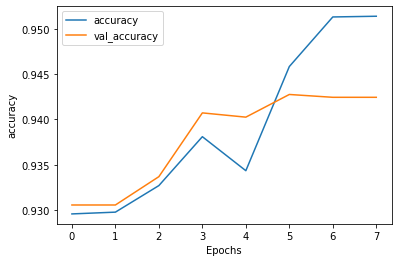

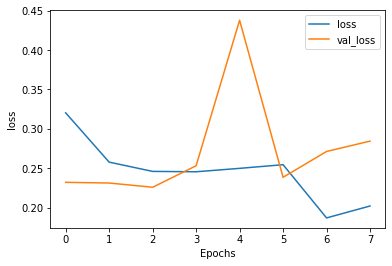

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, out_size))
model2.add(Dropout(0.5))
model2.add(LSTM(lstm_size, dropout=0.5, recurrent_dropout=0.2, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='relu'))


model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 300)         2343600   
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 300)         0         
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 64)          93440     
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [ ]:
checkpointer2 = ModelCheckpoint(filepath='sentiment2.hdf5', verbose=1, save_best_only=True)

In [ ]:
history = model2.fit(data_padded, 
                    labels, 
                    epochs=50, 
                    batch_size=200, 
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer2, reduce_learning_rate, early])

Epoch 1/50
128/128 [==============================] - 16s 128ms/step - loss: 0.2248 - accuracy: 0.9297 - val_loss: 0.2349 - val_accuracy: 0.9305

Epoch 00001: val_loss improved from inf to 0.23491, saving model to sentiment2.hdf5
Epoch 2/50
128/128 [==============================] - 16s 128ms/step - loss: 0.2151 - accuracy: 0.9306 - val_loss: 0.2569 - val_accuracy: 0.9309

Epoch 00002: val_loss did not improve from 0.23491
Epoch 3/50
128/128 [==============================] - 17s 129ms/step - loss: 0.2279 - accuracy: 0.9316 - val_loss: 0.2640 - val_accuracy: 0.9316

Epoch 00003: val_loss did not improve from 0.23491
Epoch 4/50
128/128 [==============================] - 16s 127ms/step - loss: 0.2297 - accuracy: 0.9233 - val_loss: 0.3421 - val_accuracy: 0.9305

Epoch 00004: val_loss did not improve from 0.23491

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/50
128/128 [==============================] - 17s 129ms/step - loss: 0.2106 - accuracy: 0.